In [1]:
import pandas as pd
import seaborn as sns

In [2]:
song = pd.read_csv("song_data.csv")
print(song.head(10))
len(song)
len(song["song_id"].unique())

              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

999056

In [3]:
triplet = pd.read_csv("triplets_file.csv")
print(triplet.head(10))
print(len(triplet))
len(triplet["song_id"].unique())

                                    user_id             song_id  listen_count
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D             1
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273             1
5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E             5
6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B             1
7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8             1
8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0             1
9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701             1
2000000


10000

In [4]:
data = pd.merge(triplet,song.drop_duplicates("song_id") ,on = "song_id",how="inner")
print(len(data["song_id"].unique()))
print(len(data["user_id"].unique()))
print(len(data))
print(data.head(10))

10000
76353
2000000
                                    user_id             song_id  listen_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1   
1  7c86176941718984fed11b7c0674ff04c029b480  SOAKIMP12A8C130995             1   
2  76235885b32c4e8c82760c340dc54f9b608d7d7e  SOAKIMP12A8C130995             3   
3  250c0fa2a77bc6695046e7c47882ecd85c42d748  SOAKIMP12A8C130995             1   
4  3f73f44560e822344b0fb7c6b463869743eb9860  SOAKIMP12A8C130995             6   
5  7a4b8e7d2905d13422418b4f48cc85100892e013  SOAKIMP12A8C130995             6   
6  b4a678fb729bfca6031a96948996ea909ca06fe5  SOAKIMP12A8C130995             2   
7  33280fc74b168e2667a2da5c6ab4df4cc6edfb23  SOAKIMP12A8C130995             1   
8  be21ec120193effd2a5e545c4bafa2e1f92e9816  SOAKIMP12A8C130995             1   
9  6fbb9ff93663f3c3ad206a9325d90b19278618b4  SOAKIMP12A8C130995             2   

      title             release   artist_name  year  
0  The Cove  Thicker Than Water  J

In [19]:
#Most popular artist

artist_df = data.groupby("artist_name")['listen_count'].sum().to_frame("count").reset_index()
#artist_df['artist_name'].isnull()

artist_df = artist_df.sort_values(by="count",ascending=False)

print(artist_df.head(10))


                 artist_name  count
649                 Coldplay  70138
1651           Kings Of Leon  68570
1107  Florence + The Machine  60066
914            Dwight Yoakam  54136
345                    Björk  53814
2850          The Black Keys  52220
1370            Jack Johnson  44083
1554           Justin Bieber  41645
2205             OneRepublic  40981
3174                   Train  39279


In [6]:
#Most popular song

count_songs=data.groupby("song_id")['listen_count'].sum().to_frame('count').reset_index().sort_values(by="count",ascending=False)
print(count_songs.head(10))


                 song_id  count
614   SOBONKR12A58A7A7E0  54136
317   SOAUWYT12A81C206F1  49253
7416  SOSXLTC12AF72A7F54  41418
1664  SOEGIYH12A6D4FC0E3  31153
2220  SOFRQTD12A81C233C0  31036
352   SOAXGDH12A8C13F8A1  26663
5531  SONYKOW12AB01849C9  22100
6246  SOPUCYA12A8C13A694  21019
7913  SOUFTBI12AB0183F65  19645
8252  SOVDSJC12A58A7A271  18309


In [7]:
#Details of most popular songs
for row in count_songs.head(10).values.tolist():
    print(song[song["song_id"]==row[0]])

                   song_id           title             release    artist_name  \
448841  SOBONKR12A58A7A7E0  You're The One  If There Was A Way  Dwight Yoakam   

        year  
448841  1990  
                   song_id title          release artist_name  year
111102  SOAUWYT12A81C206F1  Undo  Vespertine Live       Björk  2001
                   song_id    title            release    artist_name  year
865618  SOSXLTC12AF72A7F54  Revelry  Only By The Night  Kings Of Leon  2008
                   song_id                                              title  \
618654  SOEGIYH12A6D4FC0E3  Horn Concerto No. 4 in E flat K495: II. Romanc...   

                                release  \
618654  Mozart - Eine kleine Nachtmusik   

                                              artist_name  year  
618654  Barry Tuckwell/Academy of St Martin-in-the-Fie...     0  
                   song_id          title             release artist_name  \
808198  SOFRQTD12A81C233C0  Sehr kosmisch  Musik von Harmoni

                               release  count
2097                If There Was A Way  54136
5097                   Vespertine Live  49652
3184                 Only By The Night  46811
1773                     Greatest Hits  45360
2957                         My Worlds  38094
5147                         Waking Up  33902
3085  Now That's What I Call Music! 75  32380
3716            Save Me_ San Francisco  31865
2877   Mozart - Eine kleine Nachtmusik  31153
2924                Musik von Harmonia  31036


<AxesSubplot:xlabel='count', ylabel='release'>

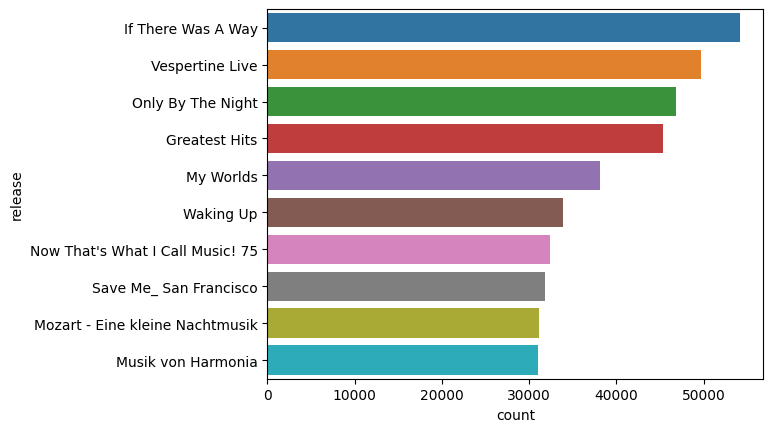

In [8]:
#most popular album

album=data.groupby("release")['listen_count'].sum().to_frame('count').reset_index()
album = album.sort_values(by="count",ascending=False).head(10)
print(album)
sns.barplot(x="count",y="release",data=album)

    year   count
56  2009  543523
55  2008  477714
54  2007  441634
53  2006  368215
52  2005  311379
50  2003  286301
51  2004  214543
48  2001  213894
49  2002  209490
57  2010  188119
    year   count
57  2010  188119


<AxesSubplot:xlabel='year', ylabel='count'>

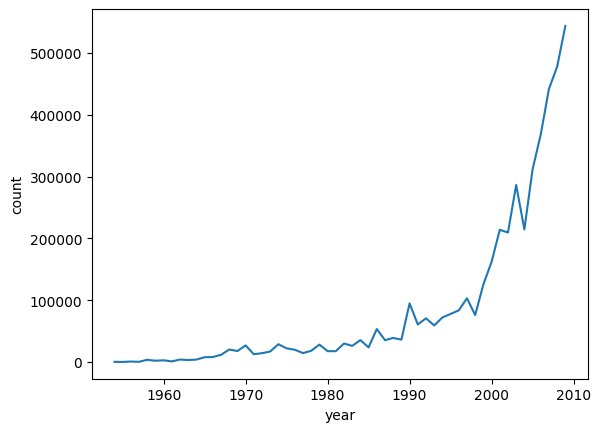

In [14]:
#Yearwise trend of listen count of songs

yearwise_trend =data.groupby(["year"])['listen_count'].sum().to_frame('count').reset_index()
yearwise_trend = yearwise_trend[1:].sort_values(by="count",ascending=False)
print(yearwise_trend.head(10))

print(yearwise_trend[yearwise_trend['year']==2010])
yearwise_trend.drop([57],axis=0,inplace=True)
sns.lineplot(x='year',y='count',data=yearwise_trend)

In [10]:
#correlation matrix

yearwise_trend.corr()

,year,count
year,1.000000,0.760321
count,0.760321,1.000000


   year  count
1  1998    448
2  1999   4320
3  2000  16684
4  2001   3162
5  2002  23447
6  2005  12921
7  2008   8139


<AxesSubplot:xlabel='year', ylabel='count'>

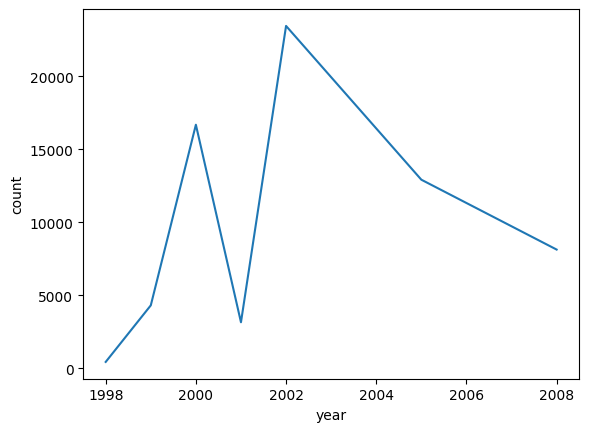

In [16]:
#Yearwise Popularity gain/loss of the most popular artist 

coldplay =data[data["artist_name"]=="Coldplay"]
coldplay = coldplay.groupby("year")["listen_count"].sum().to_frame("count").reset_index()
coldplay = coldplay.sort_values(by="year",ascending=True)[1:-1]
print(coldplay)
sns.lineplot(x='year',y='count',data=coldplay)

In [36]:
artists = artist_df['artist_name'].to_list()[0:10]
dict = {}
for i in artists:
    artist_album =data[data["artist_name"]==i]
    artist_album = artist_album.groupby("release")["listen_count"].sum().to_frame("count").reset_index()
    artist_album = artist_album.sort_values(by="count",ascending=False)[0:3]
    dict[i]=artist_album.to_dict(orient='list')

print(dict)
    

{'Coldplay': {'release': ['A Rush Of Blood To The Head', 'X & Y', 'The Scientist'], 'count': [15061, 9792, 9324]}, 'Kings Of Leon': {'release': ['Only By The Night', 'Use Somebody', 'Because Of The Times'], 'count': [46811, 11070, 4214]}, 'Florence + The Machine': {'release': ["Now That's What I Call Music! 75", 'Lungs', 'Wild Child OST'], 'count': [26663, 24570, 4232]}, 'Dwight Yoakam': {'release': ['If There Was A Way'], 'count': [54136]}, 'Björk': {'release': ['Vespertine Live', 'Post Live', 'Debut Live'], 'count': [49652, 1466, 1254]}, 'The Black Keys': {'release': ['Brothers', 'Rubber Factory', 'The Big Come Up'], 'count': [12920, 7766, 6977]}, 'Jack Johnson': {'release': ['In Between Dreams', 'Brushfire Fairytales', 'On And On'], 'count': [14074, 9073, 6070]}, 'Justin Bieber': {'release': ['My Worlds', 'One Time', 'My World'], 'count': [34693, 3616, 3336]}, 'OneRepublic': {'release': ['Waking Up', 'Dreaming Out Loud', '2009 GRAMMY Nominees'], 'count': [33902, 4574, 2505]}, 'Train